<a href="https://colab.research.google.com/github/laugustovieira/BootCamp-Data-Science/blob/main/Desafios_Modulo2_Aula6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modulo 02 Aula 06

#Importar Bibliotecas

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Carregar informações

In [3]:
dados = pd.read_csv("/content/drive/MyDrive/Dados_BootCamp/A005117189_28_143_208_2021_ATENDIMENTO.csv", encoding="ISO-8859-1",
            sep=";", skiprows = 3, skipfooter = 12, engine = "python", thousands = ".", decimal = ",")

#Tratar Dados

In [4]:
pd.options.display.float_format = "{:.2f}".format


In [5]:
colunas_usaveis_def3 = dados.mean().index.tolist()
colunas_usaveis_def3.insert(0,"Unidade da Federação")

usaveis_def3 = dados[colunas_usaveis_def3]
usaveis_def3= usaveis_def3.drop("Total", axis=1)
usaveis_def3 = usaveis_def3.set_index("Unidade da Federação")
usaveis_ordenado = usaveis_def3.sort_values(by="Unidade da Federação", ascending=False)
usaveis_ordenado.index = usaveis_ordenado.index.str[3:]
usaveis_ordenado = usaveis_ordenado[usaveis_ordenado.columns[6:]]
usaveis_ordenado = usaveis_ordenado
usaveis_ordenado.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Distrito Federal,10215956.80,11627918.26,11922015.36,11900817.00,11969271.76,11299443.00,11548451.89,12422577.60,12419976.84,12302698.99,12005669.60,13150489.00,12358825.51,14445518.57,14434211.04,14622167.93,14209413.80,14459081.79,15051993.46,14045711.83,13162775.24,13197596.70,12889509.22,13484046.67,13295738.66,14928384.44,13535496.11,14394599.86,13863063.00,14051586.56,15073336.93,14636724.40,14052063.36,14277016.84,12474757.39,14611655.44,13510243.87,15156900.72,14830081.29,15039803.35,...,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429251.56,18249176.79,19623112.14,18164306.94,21657768.52,25045580.62,26428483.82,23875303.68,21771866.33,23087586.62,20668526.36,22552034.04,22573869.50,19004029.87,14731938.43
Goiás,18149374.27,20992213.03,21049477.30,19162546.79,20362996.88,20022472.33,21054991.27,21410602.15,20610541.50,19940725.98,19343787.54,20817880.66,20215479.18,24174119.21,22943952.73,23781906.69,23683787.01,23293723.39,25835544.14,25151192.72,24757922.75,24104438.24,23202137.78,24629519.95,21862807.98,26568038.94,24607122.59,30114745.26,24546627.05,24647099.10,27313107.94,26571169.39,24729254.00,24006963.52,23938327.42,25579158.99,25471498.82,29978602.83,26873816.69,27695564.15,...,32418887.65,33774725.23,30951957.24,34889685.12,33793945.19,36429187.65,33535245.30,35400045.71,35408697.61,33813397.64,36064816.74,34904539.36,34092381.28,34795831.02,33292972.66,34964737.78,36236325.32,37829806.86,35400944.86,36502552.32,38533573.53,36415308.03,37217715.53,36302392.68,34078918.26,36432399.98,34248522.76,34808037.62,28760754.83,35104476.04,38888207.13,45871329.20,47568155.41,47951326.80,45304843.74,39785408.90,37614253.55,35655886.73,32253788.65,24867001.02
Mato Grosso,7929894.93,9416367.68,9390588.03,9378197.25,9450300.60,9789875.38,8987811.95,8843061.60,9237298.80,9459192.80,9210598.63,10039582.41,9326576.40,11680730.78,11102643.47,11495694.05,11386425.93,11658855.38,12339077.28,11600187.11,11262247.37,11734970.74,11065381.68,11839990.16,10826512.86,13243684.10,12240702.64,12781426.23,11614062.90,12193931.16,12213130.60,11923683.94,11703375.19,11484917.22,11231134.25,11689015.87,10872461.88,12323295.29,11875884.32,12160036.15,...,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16564324.20,15122951.39,13839763.36,15546808.82,14460507.38,14493916.52,12187688.07,14675991.52,18546814.06,20681571.71,20936140.39,20176196.43,20387936.40,18316623.02,18852854.81,15890528.31,13207979.82,8835890.09
Mato Grosso do Sul,8279288.79,9793888.78,8997542.75,9842108.59,10257782.00,10167827.24,9602843.49,10272466.74,10814111.53,10371654.90,9140959.80,9771575.46,9648706.17,11784290.10,11240770.37,11155445.90,11796784.62,11956687.54,12420336.71,11489768.73,11698487

In [6]:
mensal = usaveis_ordenado.T
mensal = mensal / 1000000
mensal.head()

Unidade da Federação,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Rio Grande do Sul,Santa Catarina,Paraná,São Paulo,Rio de Janeiro,Espírito Santo,Minas Gerais,Bahia,Sergipe,Alagoas,Pernambuco,Paraíba,Rio Grande do Norte,Ceará,Piauí,Maranhão,Tocantins,Amapá,Pará,Roraima,Amazonas,Acre,Rondônia
2008/Fev,10.22,18.15,7.93,8.28,45.90,24.41,48.86,172.96,44.13,10.03,70.30,33.41,4.64,8.11,26.22,10.87,9.11,27.64,9.71,13.45,5.05,1.28,20.13,0.77,7.93,1.74,1.94
2008/Mar,11.63,20.99,9.42,9.79,52.93,27.48,55.61,170.56,42.90,12.26,79.12,41.32,5.02,9.21,30.72,12.35,10.13,30.09,10.43,14.75,5.20,1.18,22.15,0.88,8.64,2.06,1.96
2008/Abr,11.92,21.05,9.39,9.00,51.97,27.81,56.12,170.34,45.31,12.45,79.05,42.83,5.27,10.47,30.59,12.68,10.96,31.38,10.23,15.15,5.34,1.40,23.44,0.90,8.53,2.06,2.14
2008/Mai,11.90,19.16,9.38,9.84,51.68,28.35,55.57,172.46,43.95,11.79,79.27,42.09,5.37,9.84,31.42,13.26,11.03,31.19,10.56,14.54,5.34,1.41,23.86,1.03,9.08,2.23,2.28
2008/Jun,11.97,20.36,9.45,10.26,53.76,28.99,56.09,175.49,44.11,11.89,79.62,39.91,4.98,10.30,28.95,12.25,10.45,29.46,10.47,14.55,5.40,1.42,23.50,0.94,8.65,2.11,2.62


In [7]:
from datetime import datetime
from datetime import date

In [8]:
meses = {"Jan":1,
         "Fev":2,
         "Mar":3,
         "Abr":4,
         "Mai":5,
         "Jun":6,
         "Jul":7,
         "Ago":8,
         "Set":9,
         "Out":10,
         "Nov":11,
         "Dez":12}

def para_data(ano_mes):
  ano = int(ano_mes[0:4])
  mes = ano_mes[5:8]
  mes = int(meses[mes])
  return date(ano, mes, 1)

mensal.index = mensal.index.map(para_data)

In [9]:
mensal.head()

Unidade da Federação,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Rio Grande do Sul,Santa Catarina,Paraná,São Paulo,Rio de Janeiro,Espírito Santo,Minas Gerais,Bahia,Sergipe,Alagoas,Pernambuco,Paraíba,Rio Grande do Norte,Ceará,Piauí,Maranhão,Tocantins,Amapá,Pará,Roraima,Amazonas,Acre,Rondônia
2008-02-01,10.22,18.15,7.93,8.28,45.90,24.41,48.86,172.96,44.13,10.03,70.30,33.41,4.64,8.11,26.22,10.87,9.11,27.64,9.71,13.45,5.05,1.28,20.13,0.77,7.93,1.74,1.94
2008-03-01,11.63,20.99,9.42,9.79,52.93,27.48,55.61,170.56,42.90,12.26,79.12,41.32,5.02,9.21,30.72,12.35,10.13,30.09,10.43,14.75,5.20,1.18,22.15,0.88,8.64,2.06,1.96
2008-04-01,11.92,21.05,9.39,9.00,51.97,27.81,56.12,170.34,45.31,12.45,79.05,42.83,5.27,10.47,30.59,12.68,10.96,31.38,10.23,15.15,5.34,1.40,23.44,0.90,8.53,2.06,2.14
2008-05-01,11.90,19.16,9.38,9.84,51.68,28.35,55.57,172.46,43.95,11.79,79.27,42.09,5.37,9.84,31.42,13.26,11.03,31.19,10.56,14.54,5.34,1.41,23.86,1.03,9.08,2.23,2.28
2008-06-01,11.97,20.36,9.45,10.26,53.76,28.99,56.09,175.49,44.11,11.89,79.62,39.91,4.98,10.30,28.95,12.25,10.45,29.46,10.47,14.55,5.40,1.42,23.50,0.94,8.65,2.11,2.62


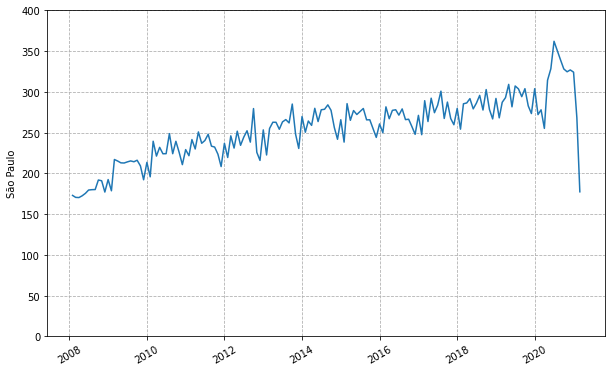

In [10]:
plt.figure(figsize = (10,6))
ax = sns.lineplot(data = mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
#comentando a linha abaixo percebe que o plota o gráfico por ano
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11))
plt.grid(True, linestyle='--')
plt.ylim(0,400)
# colocar como o método achar melhor a representação do eixo x
#ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.show()

In [11]:
#utilizando o melt para transformar cada coluna em uma linha
mensal_aberto = mensal.reset_index().melt(id_vars=["index"])
mensal_aberto.columns = ["dia_mes_ano","uf","gastos"]
mensal_aberto.head()

,dia_mes_ano,uf,gastos
0,2008-02-01,Distrito Federal,10.22
1,2008-03-01,Distrito Federal,11.63
2,2008-04-01,Distrito Federal,11.92
3,2008-05-01,Distrito Federal,11.90
4,2008-06-01,Distrito Federal,11.97


In [12]:
dias_mes = {1:31,
            2:28,
            3:31,
            4:30,
            5:31,
            6:30,
            7:31,
            8:31,
            9:30,
            10:31,
            11:30,
            12:31}

meses_extenso = {1:"Janeiro",
                  2:"Fevereiro",
                  3:"Março",
                  4:"Abril",
                  5:"Maio",
                  6:"Junho",
                  7:"Julho",
                  8:"Agosto",
                  9:"Setembro",
                  10:"Outubro",
                  11:"Novembro",
                  12:"Dezembro"}
mensal_aberto["dia_mes_ano"] = mensal_aberto["dia_mes_ano"].astype("datetime64")
mensal_aberto["mes"] = mensal_aberto["dia_mes_ano"].dt.month
mensal_aberto["ano"] = mensal_aberto["dia_mes_ano"].dt.year
mensal_aberto["mes_extenso"] = mensal_aberto["mes"].map(meses_extenso)
mensal_aberto["mes_extenso"] = mensal_aberto["mes_extenso"].astype(str)
mensal_aberto["gasto_dia"] = mensal_aberto["gastos"] / mensal_aberto["mes"].map(dias_mes)
mensal_aberto.head()

,dia_mes_ano,uf,gastos,mes,ano,mes_extenso,gasto_dia
0,2008-02-01,Distrito Federal,10.22,2,2008,Fevereiro,0.36
1,2008-03-01,Distrito Federal,11.63,3,2008,Março,0.38
2,2008-04-01,Distrito Federal,11.92,4,2008,Abril,0.40
3,2008-05-01,Distrito Federal,11.90,5,2008,Maio,0.38
4,2008-06-01,Distrito Federal,11.97,6,2008,Junho,0.40


In [15]:
estado_analisar = mensal_aberto.query("uf=='São Paulo'")
estado_analisar.head()

,dia_mes_ano,uf,gastos,mes,ano,mes_extenso,gasto_dia
1106,2008-02-01,São Paulo,172.96,2,2008,Fevereiro,6.18
1107,2008-03-01,São Paulo,170.56,3,2008,Março,5.50
1108,2008-04-01,São Paulo,170.34,4,2008,Abril,5.68
1109,2008-05-01,São Paulo,172.46,5,2008,Maio,5.56
1110,2008-06-01,São Paulo,175.49,6,2008,Junho,5.85


In [18]:
gastos_por_ano_estado = estado_analisar.groupby("ano").sum()
gastos_por_ano_estado.head()

,gastos,mes,gasto_dia
ano,,,
2008,1961.42,77,64.64
2009,2489.87,78,81.85
2010,2698.63,78,88.69
2011,2795.61,78,91.94
2012,2875.72,78,94.52


#Desafio 01: Reordenar as cores pelo valor do eixo y.

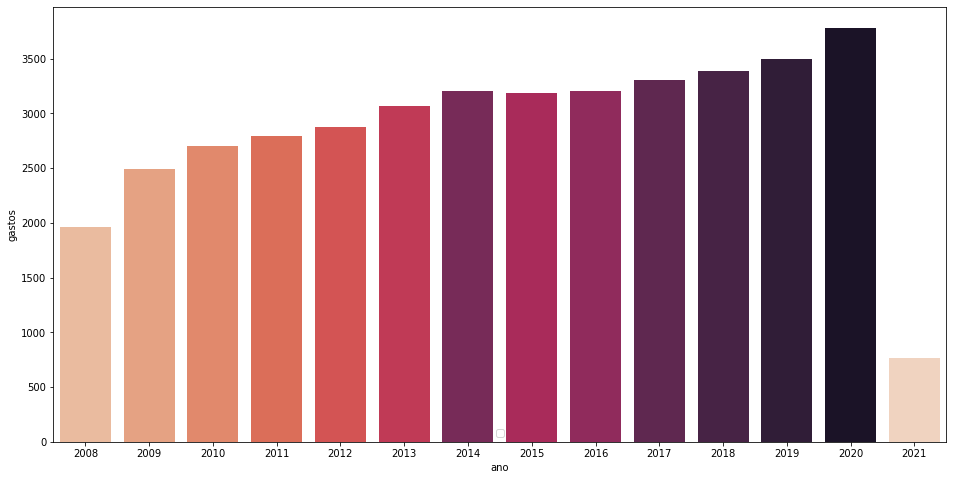

In [61]:
plt.figure(figsize=(16,8))
ax = sns.barplot(data=gastos_por_ano_estado, x=gastos_por_ano_estado.index, y="gastos", hue="gastos", dodge = False, palette= sns.color_palette("rocket_r",14))
ax.legend('')

#Desafio 02 3 03

#Desafio 02: Explorar a documentação do Seaborn.

#Desafio 03: Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.

<Figure size 1152x576 with 0 Axes>

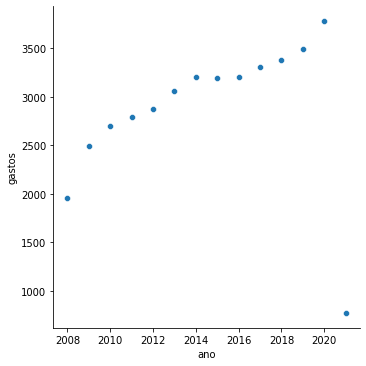

In [73]:
#replot
plt.figure(figsize=(16,8))
ax = sns.relplot(data=gastos_por_ano_estado, x=gastos_por_ano_estado.index, y="gastos")


<Figure size 1152x576 with 0 Axes>

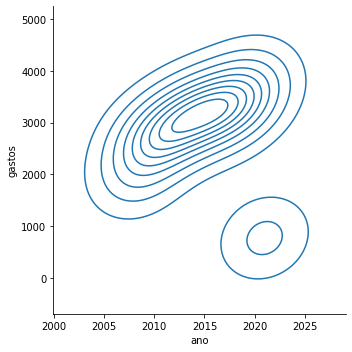

In [87]:
#displot kde
plt.figure(figsize=(16,8))
ax = sns.displot(data=gastos_por_ano_estado, x=gastos_por_ano_estado.index, y="gastos", kind="kde")

<Figure size 1152x576 with 0 Axes>

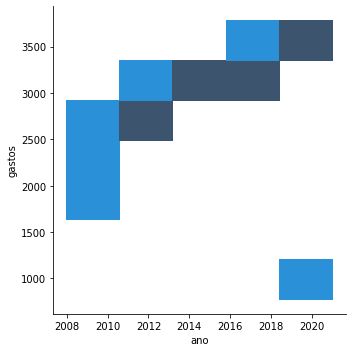

In [88]:
#displot hist
plt.figure(figsize=(16,8))
ax = sns.displot(data=gastos_por_ano_estado, x=gastos_por_ano_estado.index, y="gastos", kind="hist")

<Figure size 1152x576 with 0 Axes>

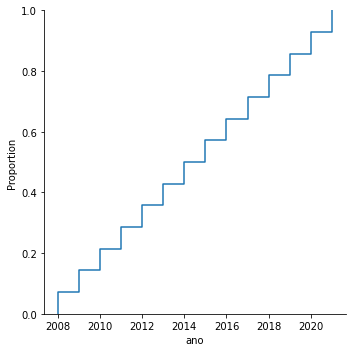

In [92]:
#displot ecdf
plt.figure(figsize=(16,8))
ax = sns.displot(data=gastos_por_ano_estado, x=gastos_por_ano_estado.index, kind="ecdf")

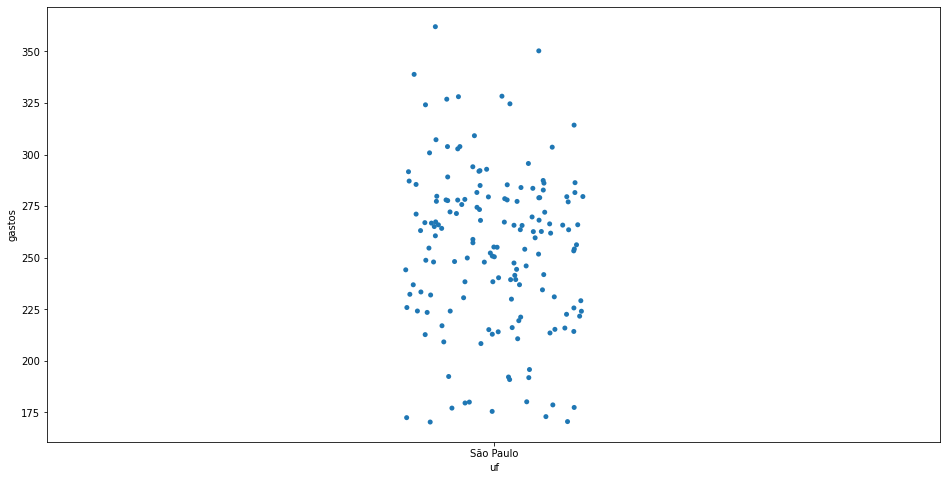

In [103]:
#displot ecdf
plt.figure(figsize=(16,8))
ax = sns.stripplot(data=estado_analisar, x="uf", y="gastos")

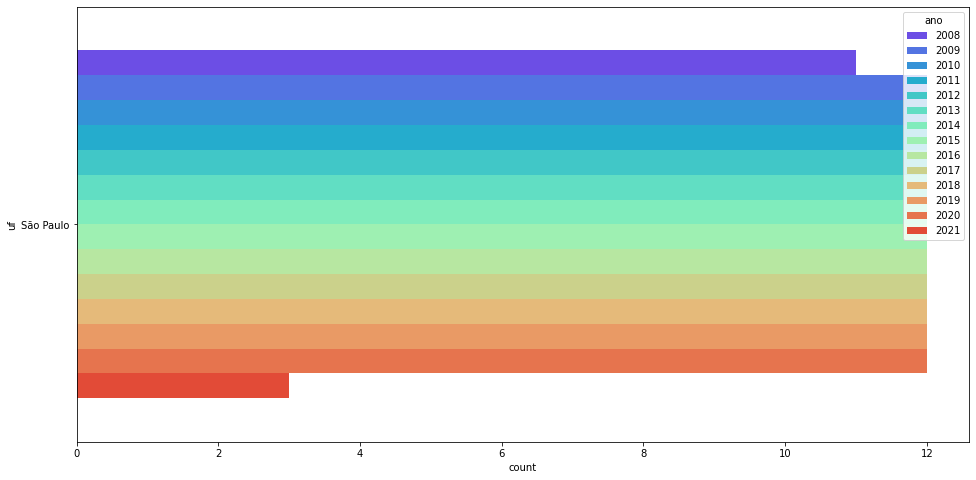

In [112]:
#displot ecdf
plt.figure(figsize=(16,8))
ax = sns.countplot(data=estado_analisar, y="uf", hue="ano", palette= sns.color_palette("rainbow",14))

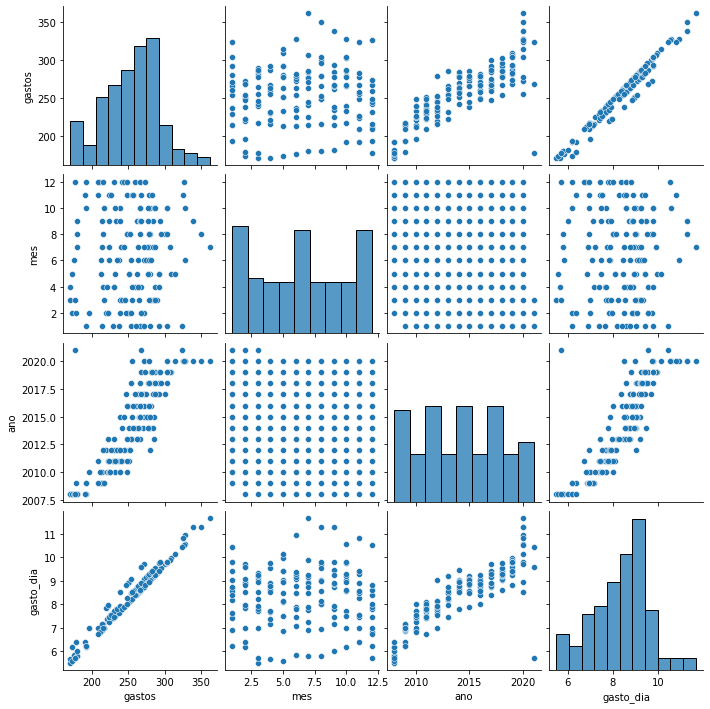

In [124]:
sns.pairplot(estado_analisar)